In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Basic approach

## Simple single plot

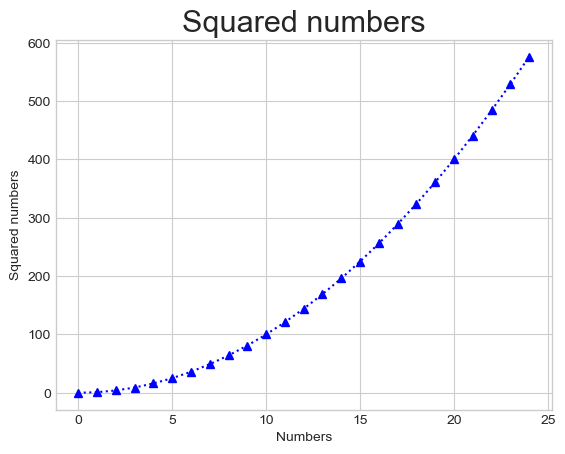

In [2]:
plt.plot([x for x in range(25)], [y**2 for y in range(25)], '^b:')
plt.title('Squared numbers', fontsize='22')
plt.xlabel('Numbers')
plt.ylabel('Squared numbers')
plt.show()

## Simple subplots 

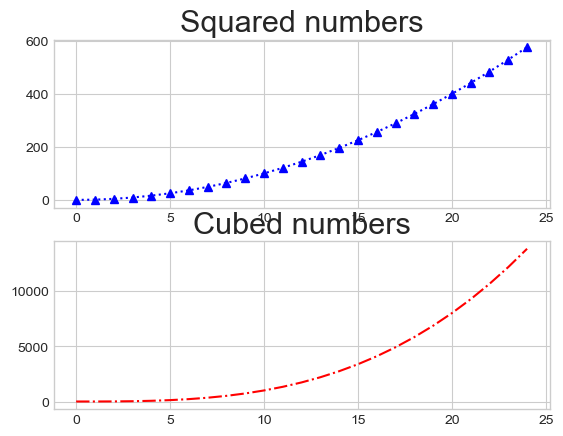

In [3]:
# indicatin a plot you work on: 
plt.subplot(2, 1, 1) #--> 2 plots in 1 column, you work on the first one

# first plot: 
plt.plot([x for x in range(25)], [y**2 for y in range(25)], '^b:')
plt.title('Squared numbers', fontsize='22')

# indicatin a plot you work on: 
plt.subplot(2, 1, 2) #--> 2 plots in 1 column, you work on the second one

# second plot
plt.plot([x for x in range(25)], [y**3 for y in range(25)], 'r-.')
plt.title('Cubed numbers', fontsize='22')

plt.show()

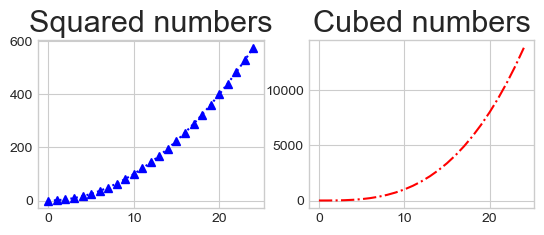

In [4]:
# same but two columns: 

# indicatin a plot you work on: 
plt.subplot(2, 2, 1) #--> 2 plots in 2 columns, you work on the first one

# first plot: 
plt.plot([x for x in range(25)], [y**2 for y in range(25)], '^b:')
plt.title('Squared numbers', fontsize='22')

# indicatin a plot you work on: 
plt.subplot(2, 2, 2) #--> 2 plots in 2 columns, you work on the second one

# second plot
plt.plot([x for x in range(25)], [y**3 for y in range(25)], 'r-.')
plt.title('Cubed numbers', fontsize='22')

plt.show()

> **Contra**: much less control and option in comparison to OOP approach

# OOP approach

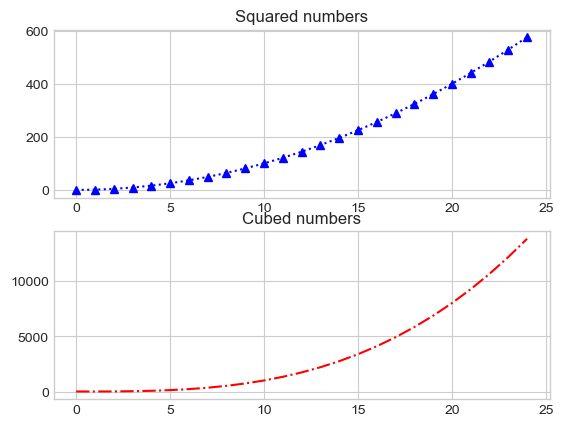

In [5]:
# first create objects: figure(the entire space of the plot) and ax(actual ax you will plot on)
fig, ax = plt.subplots(2) #--> 2 for 2 plots that you need

ax[0].plot([x for x in range(25)], [y**2 for y in range(25)], '^b:')
ax[0].set_title('Squared numbers')
ax[1].plot([x for x in range(25)], [y**3 for y in range(25)], 'r-.')
ax[1].set_title('Cubed numbers')
plt.show()

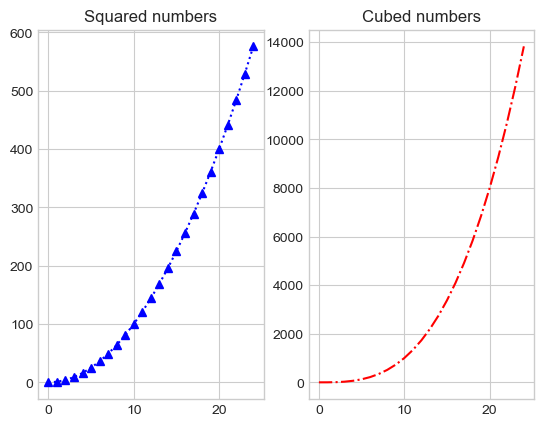

In [6]:
# same, but 2 columns: 
fig, ax = plt.subplots(1, 2) #--> 2 for 2 plots that you need

ax[0].plot([x for x in range(25)], [y**2 for y in range(25)], '^b:')
ax[0].set_title('Squared numbers')
ax[1].plot([x for x in range(25)], [y**3 for y in range(25)], 'r-.')
ax[1].set_title('Cubed numbers')
plt.show()

# Iris Dataset

## Loading data

In [7]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

## 2D Plot

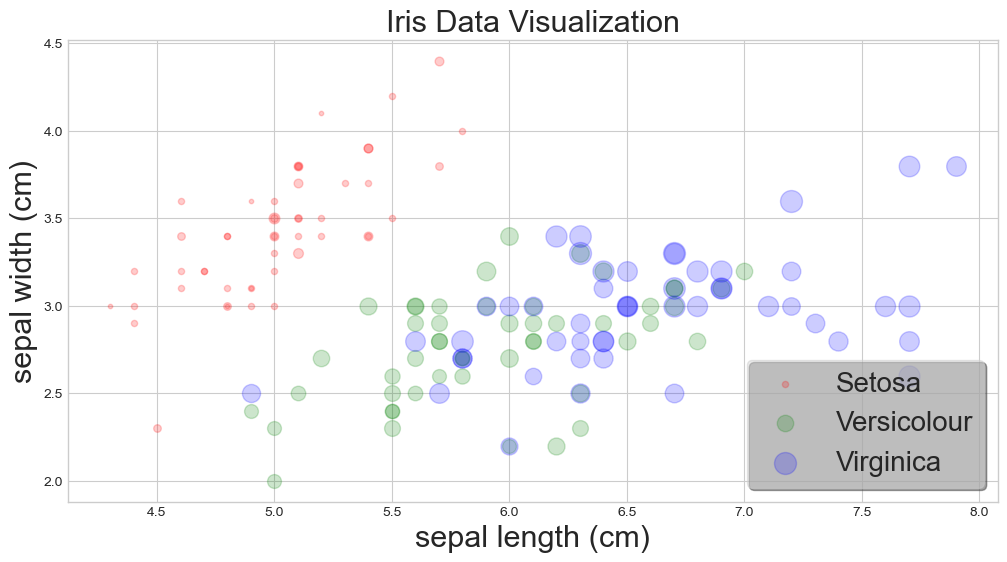

In [9]:
features = iris.data.T
labels = ['Setosa', 'Versicolour', 'Virginica']
colors = ['r', 'g', 'b']
class_label = iris.target

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

colors = np.asarray(colors)
colors_list = colors[class_label]
labels = np.asarray(labels)
labels_list = labels[class_label]

for x, y, s, c, l in zip(features[0], features[1], features[3], colors_list,
                         labels_list):
    ax.scatter(x, y, s=100 * s, color=c, label=l, cmap='viridis', alpha=0.2)

handles, labels = ax.get_legend_handles_labels()

new_leg = dict()

for h, l in zip(handles, labels):
    if l not in new_leg.keys():
        new_leg[l] = h

# here we make new handles and labels
handles = []
labels = []
for l in new_leg.keys():
    handles.append(new_leg[l])
    labels.append(l)

# create legend
ax.legend(handles,
          labels,
          loc='lower right',
          frameon=True,
          prop={'size': 20},
          facecolor='#dbdbdb',
          shadow=True,
          framealpha=0.5)
ax.set_xlabel(iris.feature_names[0], fontsize='22')
ax.set_ylabel(iris.feature_names[1], fontsize='22')
ax.set_title('Iris Data Visualization', fontsize='22')
plt.show()

## 3D Plot

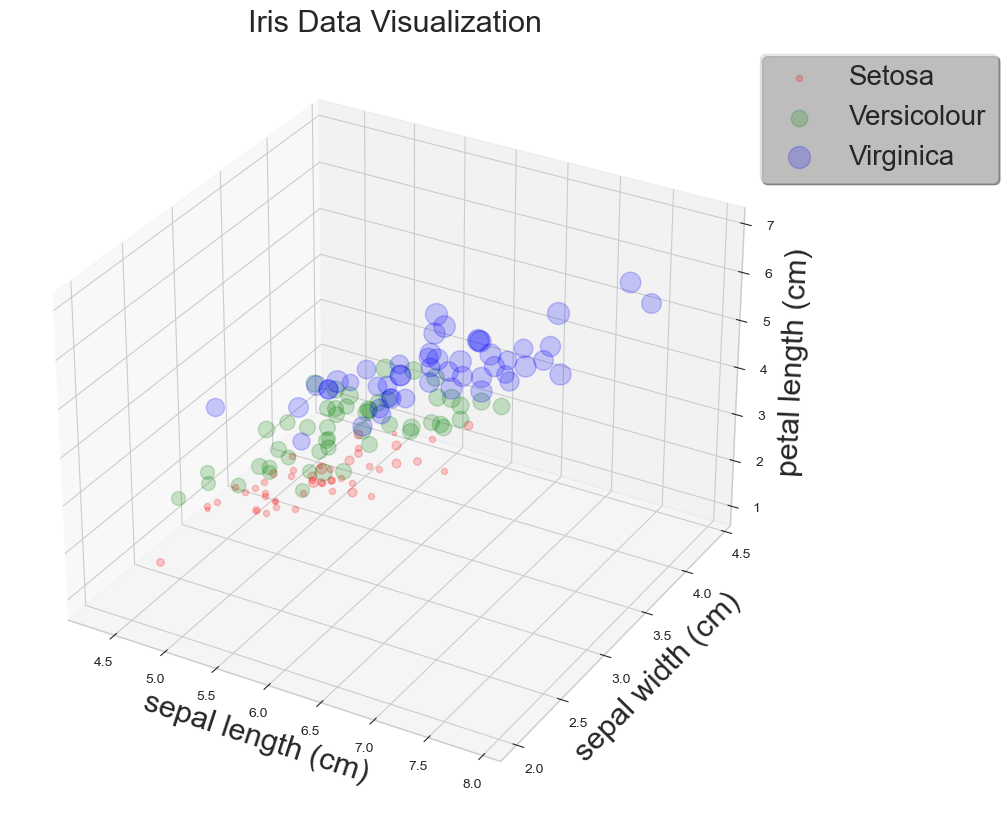

In [10]:
features = iris.data.T
labels = ['Setosa', 'Versicolour', 'Virginica']
colors = ['r', 'g', 'b']
class_label = iris.target

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = np.asarray(colors)
colors_list = colors[class_label]
labels = np.asarray(labels)
labels_list = labels[class_label]

for x, y, z, s, c, l in zip(features[0], features[1], features[2], features[3],
                            colors_list, labels_list):
    ax.scatter(x, y, z, s=100 * s, color=c, label=l, cmap='viridis', alpha=0.2)

handles, labels = ax.get_legend_handles_labels()

new_leg = dict()

for h, l in zip(handles, labels):
    if l not in new_leg.keys():
        new_leg[l] = h

# here we make new handles and labels
handles = []
labels = []
for l in new_leg.keys():
    handles.append(new_leg[l])
    labels.append(l)

# create legend
ax.legend(handles,
          labels,
          loc='best',
          bbox_to_anchor=(1.3, 1),
          frameon=True,
          prop={'size': 20},
          facecolor='#dbdbdb',
          shadow=True,
          framealpha=0.5)
ax.set_xlabel(iris.feature_names[0], fontsize='22')
ax.set_ylabel(iris.feature_names[1], fontsize='22')
ax.set_zlabel(iris.feature_names[2], fontsize='22')
ax.set_title('Iris Data Visualization', fontsize='22')
plt.show()